Get the passenger car mileage data from
(https://lib.stat.cmu.edu/DASL/Datafiles/carmpgdat.html)

(a) Fit a simple linear regression model to predict MPG (miles per gallon) from HP (horsepower).
Summarize your analysis including a plot of the data with the fitted line.

(b) Repeat the analysis but use log(MPG) as the response.
Compare the analyses.

In [1]:
from collections import namedtuple
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

In [2]:
# Read the data into a pandas data frame
df = pd.read_csv('../data/passenger_car_mileage_clean.dat', sep='\t')

# Print the data frame, as a sanity check
df

,MAKE/MODEL,VOL,HP,MPG,SP,WT
0,GM/GeoMetroXF1,89,49,65.4,96,17.5
1,GM/GeoMetro,92,55,56.0,97,20.0
2,GM/GeoMetroLSI,92,55,55.9,97,20.0
3,SuzukiSwift,92,70,49.0,105,20.0
4,DaihatsuCharade,92,53,46.5,96,20.0
...,...,...,...,...,...,...
77,Mercedes500SL,50,322,18.1,165,45.0
78,Mercedes560SEL,115,238,17.2,140,45.0
79,JaguarXJSConvert,50,263,17.0,147,45.0
80,BMW750IL,119,295,16.7,157,45.0


In [4]:
# Convert the relevant data into numpy arrays
Y = np.array(df['MPG'])
X = np.array(df['HP'])

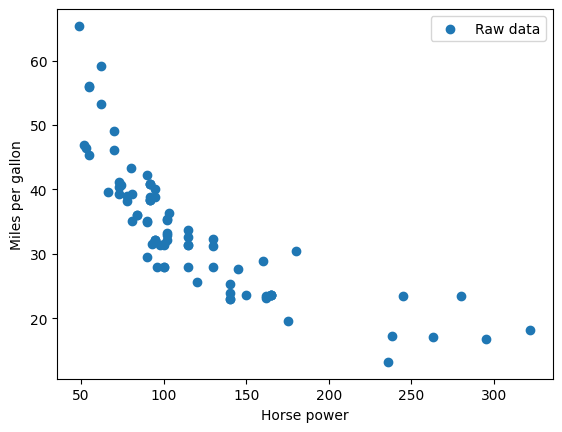

In [5]:
# Plot the raw data
plt.scatter(X, Y, label='Raw data')

plt.xlabel('Horse power')
plt.ylabel('Miles per gallon')

plt.legend(loc='best')
plt.show()

In [7]:
# The named tuple used as output of a linear regression
Simple_linear_regression_result = namedtuple('Simple_linear_regression_result', [
    'X', 'Y', 'intercept', 'slope', 'residuals', 'variance', 'wald_statistic', 'wald_pvalue'
])

# Define the linear regression computations
def simple_linear_regression(X, Y):
    
    n = len(X)
    sample_mean_X = X.mean()
    sample_mean_Y = Y.mean()
    sum_of_squares_X = np.sum(np.square(X - sample_mean_X))
    
    slope = np.dot(X - sample_mean_X, Y - sample_mean_Y)/sum_of_squares_X
    intercept = sample_mean_Y - slope*sample_mean_X
    
    residuals = Y - intercept - slope*X    
    variance = np.sum(np.square(residuals))/(n - 2)
    wald_statistic = slope*np.sqrt(sum_of_squares_X/variance)
    wald_pvalue = 2*scipy.stats.norm.cdf(-np.abs(wald_statistic))
    
    return Simple_linear_regression_result(
        X, Y, intercept, slope, residuals, variance, wald_statistic, wald_pvalue
    )

# Define how to plot the linear regression
def report(result):
    
    # Plot the simple linear regression fitted line along with the raw data

    plt.subplot(1, 2, 1)
    plt.scatter(result.X, result.Y, label='Raw data')

    x = np.array([result.X.min(), result.X.max()])
    y = result.intercept + result.slope*x
    plt.plot(x, y, label='Fitted line', color='orange')

    plt.xlabel('Horse power')
    plt.ylabel('Miles per gallon')
    plt.legend(loc='best')

    # Plot the histogram of the residuals

    plt.subplot(1, 2, 2)
    plt.hist(result.residuals, density=True, label='Residuals')
    plt.legend(loc='best')
    
    # Show the plots

    plt.show()
    
    # Report out the result of the Wald test for the null hypothesis "slope = 0"
    print(f"The p-value of the Wald test, for the null hypothesis 'beta_0 = 0', is {result.wald_pvalue:.3}.")

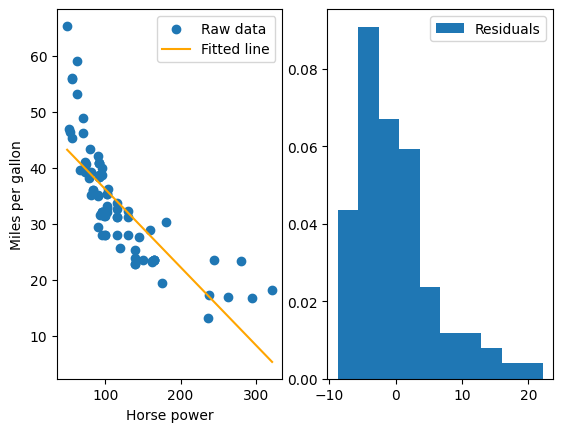

The p-value of the Wald test, for the null hypothesis 'beta_0 = 0', is 1.05e-30.


In [8]:
# Perform the simple linear regression and plot it
report(simple_linear_regression(X, Y))

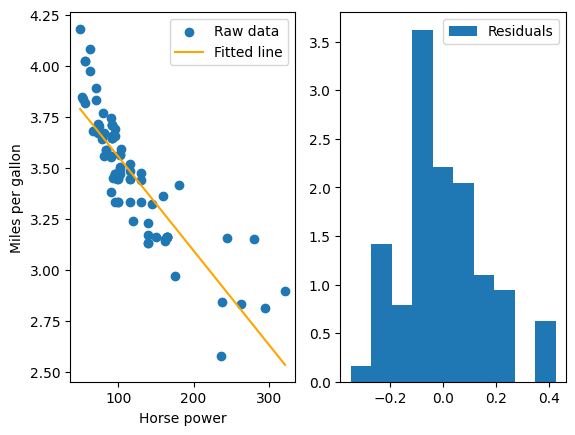

The p-value of the Wald test, for the null hypothesis 'beta_0 = 0', is 4.93e-50.


In [9]:
# Perform the simple linear regression and plot it,
# now using log(Y) as the response
report(simple_linear_regression(X, np.log(Y)))

### Summary of results
We do not yet have any quantifiable way to measure whether one model is better than the other.
However, eye-balling it, we may argue that the log-linear model is better
since the distribution of residuals more resembles a Normal distribution in that case
(at least the distribution appears more symmetric).

In that case the $p$-value for the Wald test of the null hypothesis $\beta_0 = $ is abysmally
small, which provides overwhelming evidence that, **if the simple linear regression model's noise assumptions**
then the miles per gallon is proportional the horse power.

(Note that we did not test the null $\beta_0 \geqslant 0$ so we cannot say that
the miles per gallon *decrease* with the horse power.)

In [10]:
# Now do the same thing using sklearn
from sklearn.linear_model import LinearRegression

In [13]:
# Make sure the data is in a form that sklearn can use
skX = df[['HP']]
skY = np.log(df[['MPG']])

# Perform the linear regression
reg_model = LinearRegression().fit(skX, skY)

# Report out the results
print(
    "SKLEARN\n"
    f"The estimated intercept is {reg_model.intercept_[0]:8.5}.\n"
    f"The estimated slope is     {reg_model.coef_[0, 0]:8.5}.\n"
)

# Compare to user results
X = np.array(df['HP'])
Y = np.log(np.array(df['MPG']))
user_result = simple_linear_regression(X, Y)
print(
    "USER RESULT\n"
    f"The estimated intercept is {user_result.intercept:8.5}.\n"
    f"The estimated slope is     {user_result.slope:8.5}."
)

SKLEARN
The estimated intercept is   4.0132.
The estimated slope is     -0.0045889.

USER RESULT
The estimated intercept is   4.0132.
The estimated slope is     -0.0045889.
